In [61]:
from keras.datasets import mnist

In [62]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [63]:
print(f'x_train.shape: {x_train.shape}')
print(f'x_test.shape: {x_test.shape}')
print(f'y_train.shape: {y_train.shape}')
print(f'y_test.shape: {y_test.shape}')

x_train.shape: (60000, 28, 28)
x_test.shape: (10000, 28, 28)
y_train.shape: (60000,)
y_test.shape: (10000,)


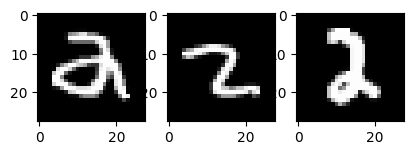

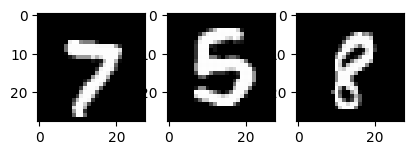

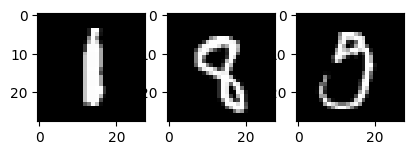

In [64]:
import matplotlib.pyplot as plt
import random

for i in range(1, 4, 1):
    for j in range(1, 4, 1):
        plt.subplot(i, 4, j)
        plt.imshow(x_train[random.randint(0,60000)], cmap="gray")
    plt.show()

In [65]:
x_train_vec = x_train.reshape((60000, 28, 28, 1))
x_test_vec = x_test.reshape((10000, 28, 28, 1))

print(f'x_train.shape: {x_train.shape}')
print(f'x_test.shape: {x_test.shape}')

print(f'x_train_vec.shape: {x_train_vec.shape}')
print(f'x_test_vec.shape: {x_test_vec.shape}')

x_train.shape: (60000, 28, 28)
x_test.shape: (10000, 28, 28)
x_train_vec.shape: (60000, 28, 28, 1)
x_test_vec.shape: (10000, 28, 28, 1)


In [66]:
# One-hot Encoding
# 0 => [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
# 1 => [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
# 2 => [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
# 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]

import numpy as np

def to_one_hot(labels, dimension=10):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

y_train_vec = to_one_hot(y_train)
y_test_vec = to_one_hot(y_test)

print(f"y_train_vec.shape:{y_train_vec.shape}")


y_train_vec.shape:(60000, 10)


In [67]:
print(y_train[50000])
print(y_train_vec[50000])

3
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [68]:
for x in x_train[50000]:
    for i in x:
        print('{:3} '.format(i), end='')
    print()

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0  47 160 195 205  71  86  13   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0  12 238 254 254 254 254 254 227  84   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0  13 196 176 127 176 207 236 245 222  23   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  20 137 254  95   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  78 254 144   0   0   0   0   0 

In [69]:
rand_indices = np.random.permutation(60000)
train_indices = rand_indices[0:50000]
valid_indices = rand_indices[50000:60000]

x_valid_vec = x_train_vec[valid_indices, :, :, :]
y_valid_vec = y_train_vec[valid_indices, :]

x_train_vec = x_train_vec[train_indices, :, :, :]
y_train_vec = y_train_vec[train_indices, :] 

In [71]:
x_train_vec.shape

(50000, 28, 28, 1)

In [93]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(filters=10, kernel_size=(5, 5), activation='relu', 
                 input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=20, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)              │ (None, 24, 24, 10)     │           260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 12, 12, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 8, 8, 20)       │         5,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 4, 4, 20)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 320)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │        32,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,390 (149.96 KB)

 Trainable params: 38,390 (149.96 KB)

 Non-trainable params: 0 (0.00 B)